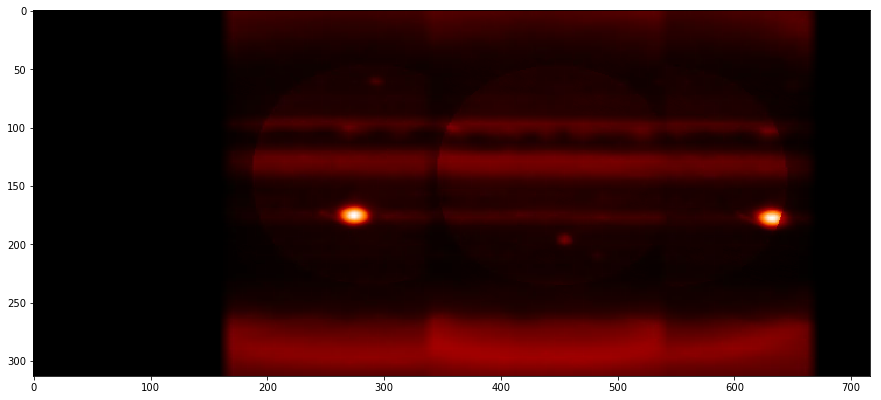

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15,12))
plt.imshow(mpimg.imread('../imgs/2017may_2.16_lmap.png'))
plt.show()

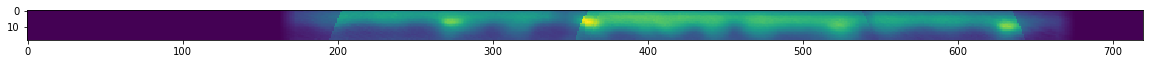

In [4]:
from astropy.io import fits
import numpy as np
data = np.flip(fits.open("../fits/2017may_2.16_neb.fits")[0].data, 0)
plt.figure(figsize=(20, 1))
plt.imshow(data)
plt.show()

In [10]:
from copy import deepcopy

def rollingMedian(data, numWindows=10):
    rollingMed = deepcopy(data)
    windowSize = int(len(data)/numWindows)
    for i in range(0, len(data), windowSize):
        if i+windowSize > len(data):
            rollingMed[i:] = np.full(len(data)-i, np.median(data[i:]))
        else:
            rollingMed[i:i+windowSize] = np.full(windowSize, np.median(data[i:i+windowSize]))
    return rollingMed

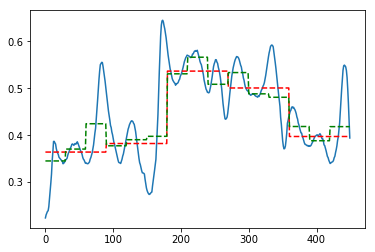

In [6]:
avg = np.mean(data, 0)[190:640]
lon = np.arange(len(avg))
plt.plot(lon, avg)
plt.plot(lon, rollingMedian(avg, numWindows=5), color='red', linestyle='--')
plt.plot(lon, rollingMedian(avg, numWindows=15), color='green', linestyle='--')
plt.show()

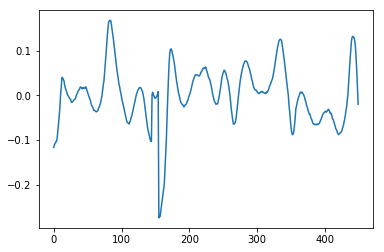

In [13]:
from scipy.signal import detrend
plt.plot(lon, detrend(avg, bp=[145,155]))
plt.show()

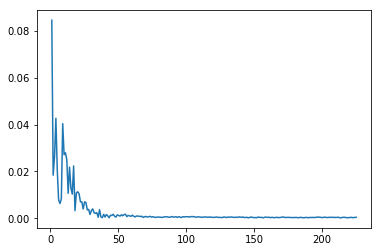

In [15]:
#(Non-detrended data)

N = len(avg_detrended)
T = 1.0/N
x = np.linspace(0.0, N * T, N)
fourier = fft(avg)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf[1:], 2.0/N * np.abs(fourier[1:N//2]))
plt.show()

In [18]:
print(np.flip(np.argsort(fourier[0:N//2]))[:10])
print(720 / N * np.flip(np.argsort(fourier[0:N//2]))[:10])

[ 0 11  5 10  4  2 16  8  7 21]
[ 0.  17.6  8.  16.   6.4  3.2 25.6 12.8 11.2 33.6]


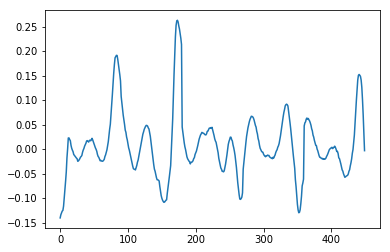

In [12]:
avg_detrended = avg-rollingMedian(avg, numWindows=5)
avg_detrended -= np.median(avg_detrended)
plt.plot(lon, avg_detrended)
plt.show()

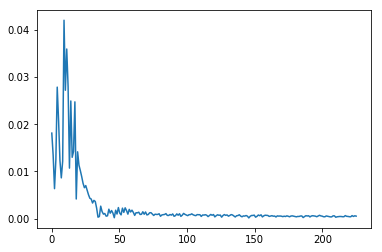

In [13]:
from scipy import fft
N = len(avg_detrended)
T = 1.0/N
x = np.linspace(0.0, N * T, N)
fourier_detrended = fft(avg_detrended)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(fourier_detrended[0:N//2]))
plt.show()

In [19]:
#wave power in descending order
print(np.flip(np.argsort(fourier_detrended[0:N//2]))[:10])
#wave powers corrected for observation width
print(720 / N * np.flip(np.argsort(fourier_detrended[0:N//2]))[:10])

[11  5  0 10 16  8 21  6 26 31]
[17.6  8.   0.  16.  25.6 12.8 33.6  9.6 41.6 49.6]


In [1]:
#Using Lomb-Scargle periodogram
from astropy.timeseries import LombScargle

lon_normed = lon/N
frequency, power = LombScargle(lon_normed,avg).autopower()
plt.plot(frequency[:len(frequency)//20], power[:len(frequency)//20])
plt.show()
print(720 / N * frequency[np.flip(np.argsort(power[0:len(frequency)//20]))][:20])

NameError: name 'lon' is not defined

In [ ]:
lon_normed = lon/N
frequency, power = LombScargle(lon_normed,avg_detrended).autopower()
plt.plot(frequency[:len(frequency)//20], power[:len(frequency)//20])
plt.show()
print(720 / N * frequency[np.flip(np.argsort(power[0:len(frequency)//20]))][:10])